<a href="https://colab.research.google.com/github/Hena-123/095_HenaPatel/blob/main/Lab10/Lab10_ANN_CNN_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hena Patel**

---


**(CE095-18CEUOS114)**

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader


from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

# Convert to float32.
features_train = np.array(features_train, np.float32)
features_test = np.array(features_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
num_features=784
features_train = features_train.reshape(-1,num_features)
features_test = features_test.reshape(-1,num_features)

#features_train, features_test = features_train.reshape([-1, num_features]), features_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
features_train = features_train / 255
features_test = features_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
# An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
# Datasets are usually grouped into batches (especially when the amount of data is very large).
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

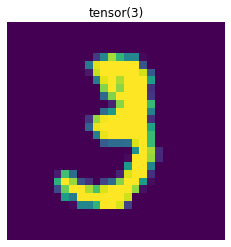

In [4]:
# visualize one of the images in data set
plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()

In [5]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
      super(ANNModel, self).__init__()
      self.layer1 = nn.Linear(input_dim, hidden_dim)
      self.layer2 = nn.Linear(hidden_dim, hidden_dim)
      self.layer3 = nn.Linear(hidden_dim, output_dim)
      self.relu = nn.ReLU()
    
    def forward(self, x):
      return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7801715731620789  Accuracy: 82.08000183105469 %
Iteration: 1000  Loss: 0.5139306783676147  Accuracy: 89.0 %
Iteration: 1500  Loss: 0.5762182474136353  Accuracy: 90.16000366210938 %
Iteration: 2000  Loss: 0.288921594619751  Accuracy: 91.0999984741211 %
Iteration: 2500  Loss: 0.20575276017189026  Accuracy: 91.88999938964844 %
Iteration: 3000  Loss: 0.31882646679878235  Accuracy: 92.51000213623047 %
Iteration: 3500  Loss: 0.2507210075855255  Accuracy: 93.08999633789062 %
Iteration: 4000  Loss: 0.29282304644584656  Accuracy: 93.69000244140625 %
Iteration: 4500  Loss: 0.40391525626182556  Accuracy: 93.56999969482422 %


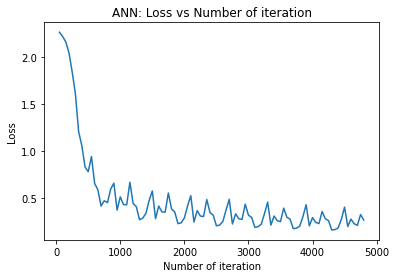

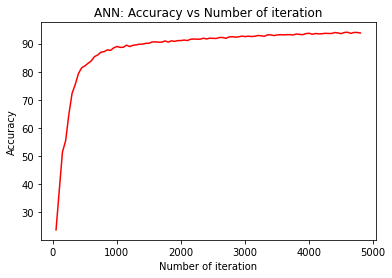

In [7]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [8]:

# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
      super(CNNModel, self).__init__()

      ######################################################################       
      #### DESIGN LAYERS :
      ### SEQUENCE: CONV1,ACTIVATION1,POOLING1,  CONV2,ACTIVATION2,POOLING2, LINEAR(FC)
      self.layer1 = nn.Conv2d(1, 2, 5)
      self.relu = nn.ReLU()
      self.pool1 = nn.MaxPool2d(2)
      self.layer2 = nn.Conv2d(2, 4, 5)
      self.pool2 = nn.MaxPool2d(4)
      self.layer3 = nn.Linear(4 * 2 * 2, 10)

    def forward(self,x):
       # COMBINE LAYERS
       ## 1) CONV1
      out = self.layer1(x)
       ## 2) ACTIVATION1
      out = self.relu(out)
       ## 3) POOLING1
      out=self.pool1(out)
       
       ## 4) CONV2
      out=self.layer2(out)

       ## 5) ACTIVATION2
      out=self.relu(out)

       ## 6) POOLING2
      out=self.pool2(out)

       ## 7) flatten ########## DURING LAB WE JUST FORGOT FOLLOWING FLATTEN LAYER ###############
      out = out.view(out.size(0), -1)

       ## 8) LINEAR(FC)
      return self.layer3(out)


# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [9]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
        
    train = Variable(images.view(100,1,28,28))
    labels = Variable(labels)
        
    # Clear gradients
    optimizer.zero_grad()
        
    # Forward propagation
    outputs = model(train)
        
    # Calculate softmax and ross entropy loss
    loss = error(outputs, labels)
        
    # Calculating gradients
    loss.backward()    
        
    # Update parameters
    optimizer.step()      
        
    count += 1
        
    if count % 50 == 0:
      # Calculate Accuracy         
      correct = 0
      total = 0
      # Iterate through test dataset
      for images, labels in test_loader:
                
        test = Variable(images.view(100,1,28,28))
                
        # Forward propagation
        outputs = model(test)
                
        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
                
        # Total number of labels
        total += len(labels)
                
        correct += (predicted == labels).sum()
            
        accuracy = 100 * correct / float(total)
            
        # store loss and iteration
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)
        if count % 500 == 0:
          # Print Loss
          print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 500  Loss: 0.3508661687374115  Accuracy: 92.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 92.5 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 91.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 90.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 89.80000305175781 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 88.83333587646484 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 89.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 89.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 89.33333587646484 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 89.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 89.0 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 88.83333587646484 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 88.46154022216797 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 88.5 %
Iteration: 500  Loss: 0.3508661687374115  Accuracy: 88.4000015258789 %
Iteration: 500  Loss: 0.35086616873741

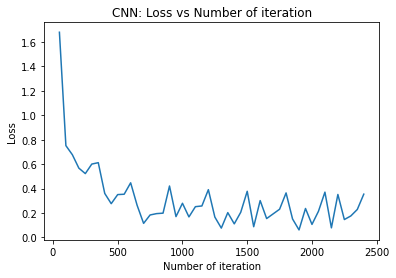

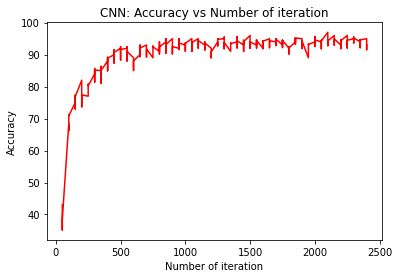

In [10]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()